<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 δείγματα του φυτού <i>Ίρις</i> με βάση τα δεδομένα που σας δίνονται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε δείγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο σύνολο δεδομένων του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε τον βέλτιστο αριθμό των <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση το βέλτιστο αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πως λειτουργεί ο αλγόριθμος.</li>
<li>Να σχεδιάσετε τις πραγματικές κλάσεις, καθώς και τις κλάσεις που προκύπτουν από το μοντέλο <i>k-means</i>. Τι παρατηρείτε;</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>). Αναλύστε τα
αποτελέσματα. Πριν υλοποιήσετε τους ελέγχους, να λάβετε υπόψη το γεγονός ότι οι
αριθμοί που χρησιμοποιούνται στο <i>iris.target</i> για τα είδη του φυτού, δεν έχουν καμία σχέση με τους αριθμούς που χρησιμοποιούνται από το μοντέλο <i>k-means</i> για τον ορισμό των <i>clusters</i>.</li>
</ul>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [2]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()

In [3]:
#print is optional
print(iris.data)
iris.feature_names
print(iris.target)
iris.target_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# DO NOT RUN - Scale the Data 
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x =pd.DataFrame(min_max.fit_transform(x), columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])

In [5]:
x =pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Text(0.5, 1.0, 'Sepal VS Petal Lenght')

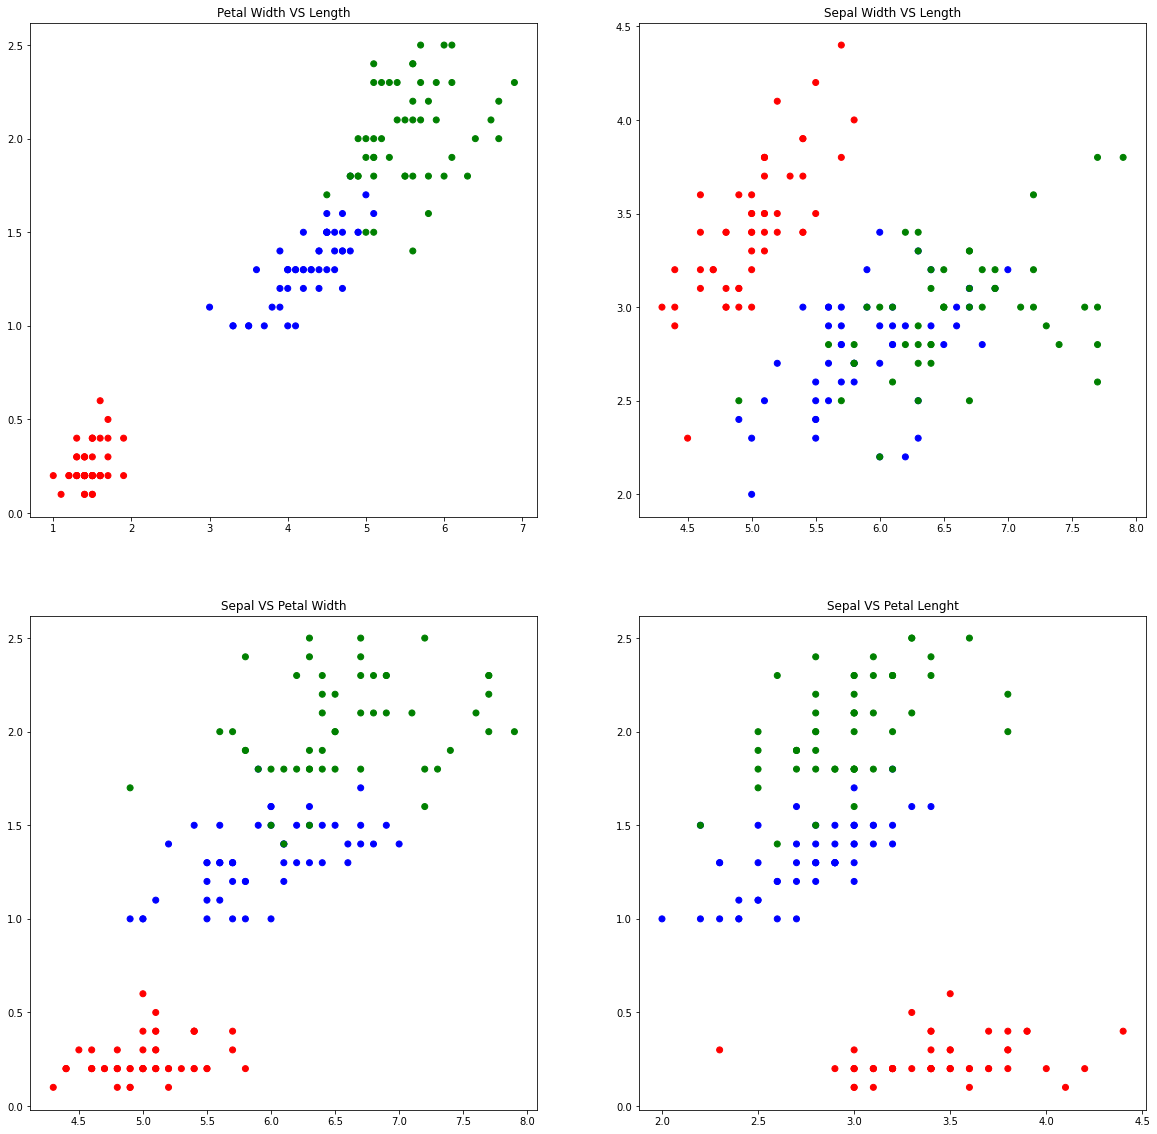

In [6]:
color = np.array(['red', 'blue', 'green'])

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.scatter( x = x.Petal_Length, y=x.Petal_Width, c=color[iris.target])
plt.title('Petal Width VS Length')

plt.subplot(222)
plt.scatter( x = x.Sepal_Length, y=x.Sepal_Width, c=color[iris.target])
plt.title('Sepal Width VS Length')

plt.subplot(223)
plt.scatter( x = x.Sepal_Length, y=x.Petal_Width, c=color[iris.target])
plt.title('Sepal VS Petal Width')

plt.subplot(224)
plt.scatter( x = x.Sepal_Width, y=x.Petal_Width, c=color[iris.target])
plt.title('Sepal VS Petal Lenght')

### Elbow Method
> As we can observe from the **Elbow** figure, the best number of clusters is K=3 which is the same as the number of different plant categories we have in our Iris dataset. 

K= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Minimum K value: 0.14817627731549124 
K for minimum value: 19


Text(0.5, 1.0, 'Elbow Plot')

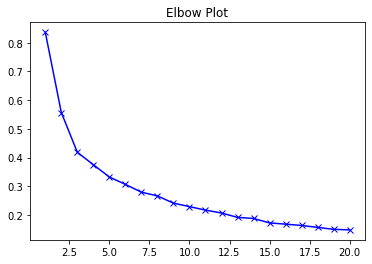

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import math 

distortions = []
K=np.arange(1,21,1)
print('K=',K)

X = x.loc[:,['Sepal_Length', 'Sepal_Width']]
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_, 'euclidean'), axis=1))/x.shape[0])
    
print('Minimum K value:',np.min(distortions), '\nK for minimum value:',np.argmin(distortions))


plt.plot(K,distortions,'bx-')
plt.title('Elbow Plot')


### K-Means Algorithm

### Functionality of K-Means
> 1. The first step is to randomly initialize a few points which are called cluster centroids-K. This K can be any number <= from the total number of data points

> 2. In the second step is the cluster assignment- assing each data point to the cluster center that is closer 

> 3. In the third step for each created cluster we take the average of all the points belonging to this cluster and we move this clusters centroid to the average value.

> 4. Steps 2 and 3 are repeated until we reach the optimal case, in which the cluster centroids are in suitable positions 

In [8]:
X1 = x.loc[:,['Sepal_Length', 'Sepal_Width']]
kmeans_model_f = KMeans(n_clusters=3)
kmeans_model_f.fit(X1)
centers_1 = kmeans_model_f.cluster_centers_
new_labels_1 = kmeans_model_f.labels_
print('Centers:',centers_1, '\nNew Labels:', new_labels_1)

Centers: [[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]] 
New Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [9]:
X2 = x.loc[:,['Petal_Length', 'Petal_Width']]
kmeans_model_f = KMeans(n_clusters=3)
kmeans_model_f.fit(X2)
centers_2 = kmeans_model_f.cluster_centers_
new_labels_2 = kmeans_model_f.labels_
print('Centers:',centers_2, '\nNew Labels:', new_labels_2)

Centers: [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]] 
New Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


### Plot of the Results

Text(0.5, 1.0, 'PREDICTED VALUES: Sepal Width VS Length')

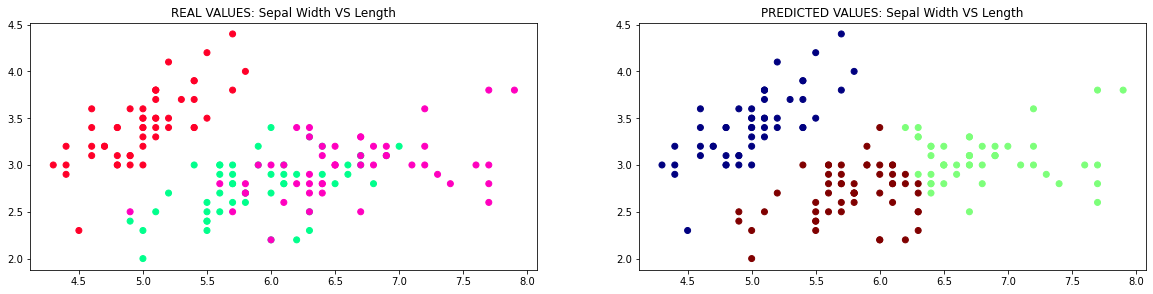

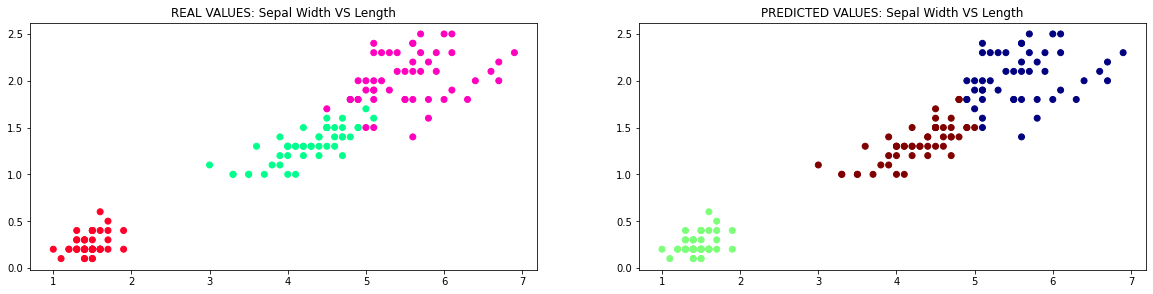

In [10]:
color = np.array(['red', 'blue', 'green'])
color2 = np.array(['red', 'blue', 'green'])

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter( x = X1.Sepal_Length, y=X1.Sepal_Width, c=iris.target, cmap='gist_rainbow')
plt.title('REAL VALUES: Sepal Width VS Length')

plt.subplot(222)
plt.scatter( x = X1.Sepal_Length, y=X1.Sepal_Width, c= new_labels_1,cmap='jet' )
plt.title('PREDICTED VALUES: Sepal Width VS Length')

plt.figure(figsize=(20,10))
plt.subplot(223)
plt.scatter( x = X2.Petal_Length, y=X2.Petal_Width, c=iris.target,cmap='gist_rainbow')
plt.title('REAL VALUES: Sepal Width VS Length')

plt.subplot(224)
plt.scatter( x = X2.Petal_Length, y=X2.Petal_Width, c=new_labels_2, cmap='jet')
plt.title('PREDICTED VALUES: Sepal Width VS Length')


*Observations:*
> As we can observe from the above figures; the predictions for both cases are sufficient. Of course the color of the dots is of no meaning for the specific algorithm since it operates in an unsupervised manner (without providing the target variables).Thus we chose different colorpalettes for the Real and predicted values respectuvely. The general shape of the classification is well preserved in both cases, but in the case where the **Petal** information was used (fig3,4) the K-Means provided a  better fit. 